In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
import seaborn as sns
import re
from datetime import datetime, timedelta
import missingno as msno

In [296]:
columns_to_read = 'B:FO'

In [297]:
df = pd.read_excel("../data/cfpb_updated_tccp.xlsx",skiprows=9,usecols=columns_to_read)

In [298]:
df.head()

,Institution Name,Product Name,Report Date,Availability of Credit Card Plan,State,State (Multiple),Pertains to Specific Counties?,Requirements for Opening,Requirements for Opening Types,Geographic Restrictions,...,Services,Other Services,Rewards,Other Rewards,Card Features,Other Card Features,Contact Information Types,Website for Consumer,Telephone Number for Consumers,Created Date
0,FNBT BANK,MasterCard,Data as of December 31,National,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,Cashback rewards,NaN,Chip card,NaN,Phone; Website,https:www.fnbt.com,1-800-899-4321,3/21/2023
1,WINTHROP AREA FEDERAL CREDIT UNION,Visa Credit Platinum,Data as of December 31,National,NaN,NaN,NaN,No,NaN,NaN,...,NaN,NaN,Cashback rewards; Travel-related rewards,NaN,Contactless Payments; Chip card; Fee-free fore...,NaN,Phone; Website,https://www.winthropcreditunion.org,800-511-1120,3/21/2023
2,WOORI AMERICA BANK,Classic,Data as of December 31,National,NaN,NaN,NaN,Yes,NaN,NaN,...,Automobile rental insurance; Credit card regis...,NaN,Travel-related rewards,NaN,Chip card; Fee-free foreign transactions; Mobi...,NaN,Website,https://www.wooriamericabank.com,NaN,3/21/2023
3,CENTRAL BANK & TRUST COMPANY,Classic Visa,Data as of December 31,Regional,NaN,IN; KY; OH,No,Yes,NaN,NaN,...,Automobile rental insurance; Other,Roadside assistance,NaN,NaN,Contactless Payments; Chip card; Mobile wallet...,NaN,Phone; Website,https://www.centralbank.com,(800)637-6884,3/22/2023
4,CLEARWATER FEDERAL CREDIT UNION,Visa,Data as of December 31,National,NaN,NaN,NaN,No,Other. Please Describe:,NaN,...,Debt cancellation coverage; Other,Visa's credit monitoring (Norton Lifelock cred...,NaN,NaN,Contactless Payments; Chip card; Mobile wallet...,NaN,Phone; Website,https://www.clearwatercreditunion.org,800-254-1803,3/22/2023


In [299]:
df.shape

(648, 170)

<Axes: >

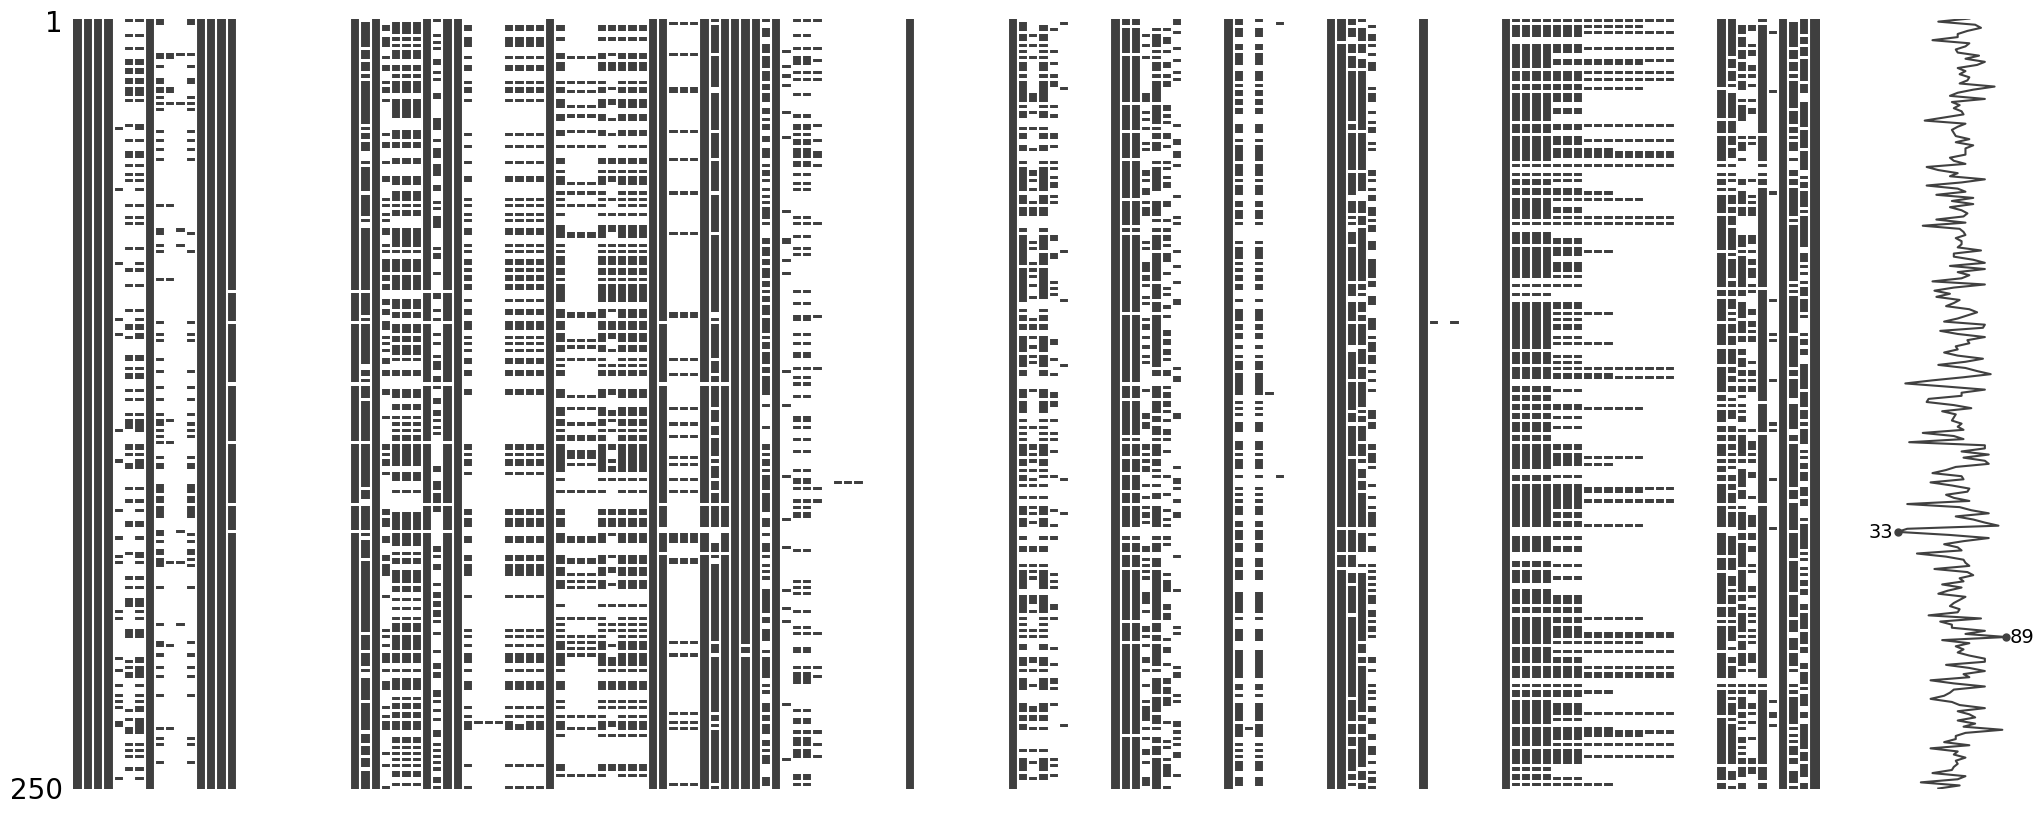

In [300]:
msno.matrix(df.sample(250))

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Columns: 170 entries, Institution Name to Created Date
dtypes: float64(97), object(73)
memory usage: 860.8+ KB


In [302]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

In [303]:
type(null_percentage)

pandas.core.series.Series

In [304]:
null_percentage.shape

(170,)

In [305]:
# set threshold
threshold = 90

In [306]:
# Create a list of column names to drop where the null percentage is greater than or equal to the threshold
columns_to_drop = null_percentage[null_percentage >= threshold].index.tolist()

In [307]:
len(columns_to_drop)

68

In [308]:
# drop the columns
df.drop(columns=columns_to_drop,inplace=True)

In [309]:
df.shape

(648, 102)

<Axes: >

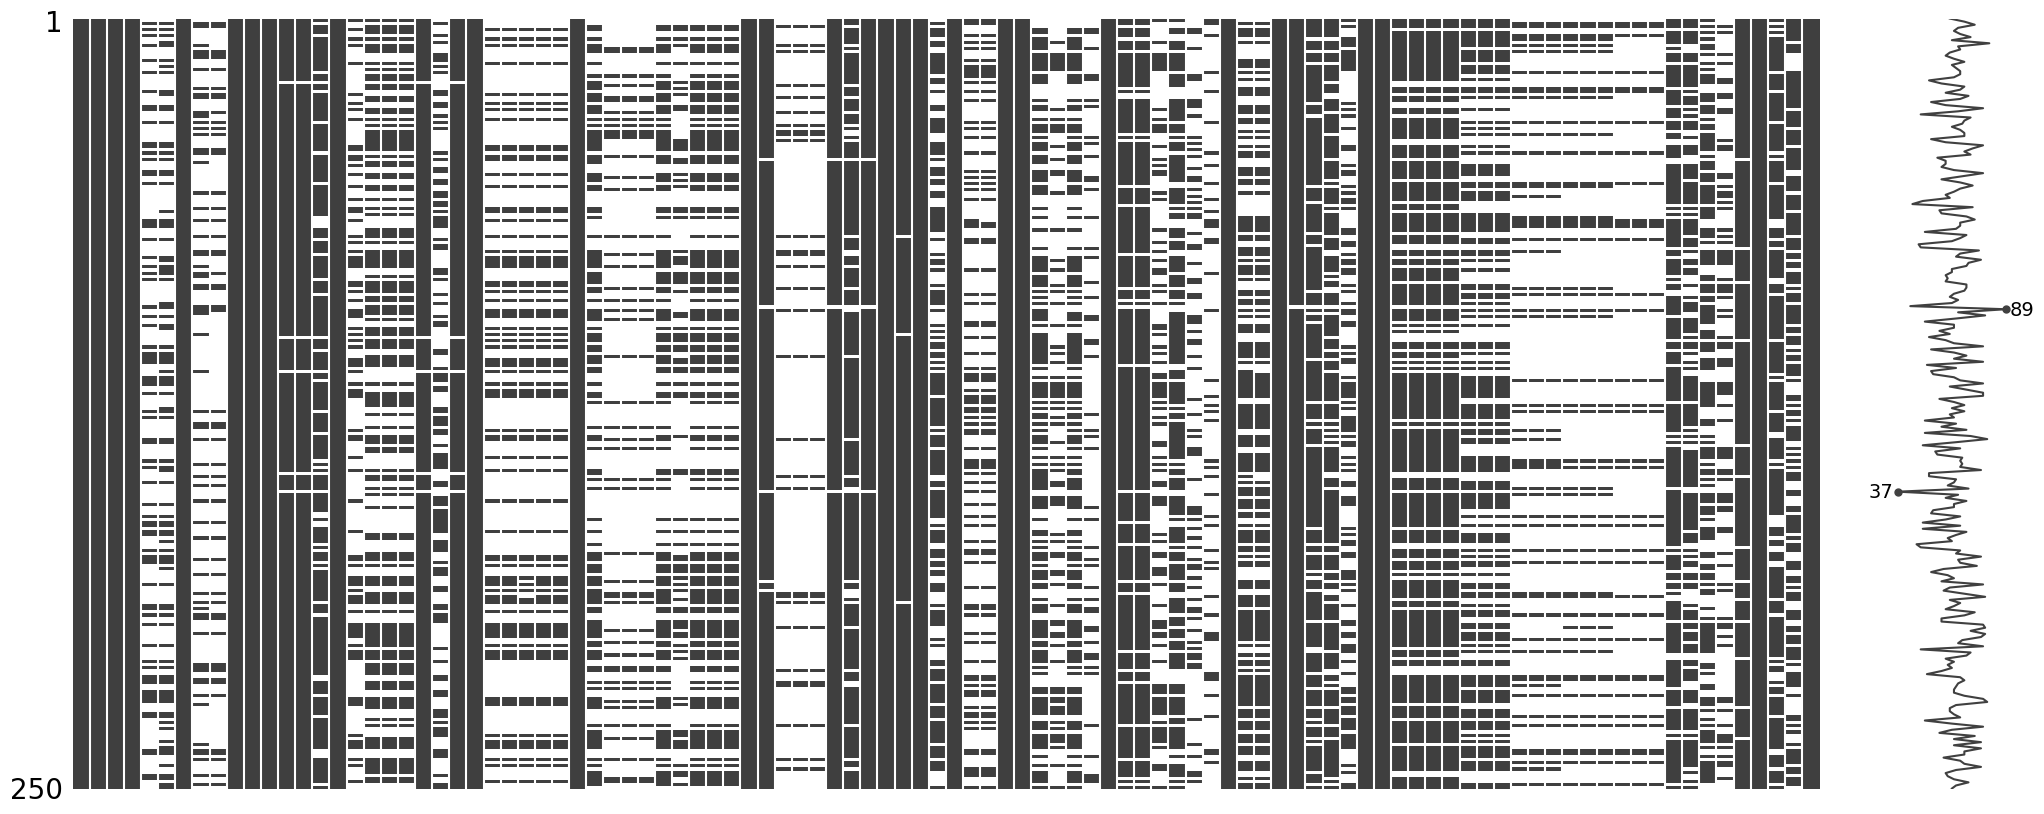

In [310]:
msno.matrix(df.sample(250))

In [311]:
df.head()

,Institution Name,Product Name,Report Date,Availability of Credit Card Plan,State (Multiple),Pertains to Specific Counties?,Requirements for Opening,Requirements for Opening Types,Other,Secured Card,...,Other Fee Explanation.4,Services,Other Services,Rewards,Other Rewards,Card Features,Contact Information Types,Website for Consumer,Telephone Number for Consumers,Created Date
0,FNBT BANK,MasterCard,Data as of December 31,National,NaN,NaN,No,NaN,NaN,No,...,NaN,NaN,NaN,Cashback rewards,NaN,Chip card,Phone; Website,https:www.fnbt.com,1-800-899-4321,3/21/2023
1,WINTHROP AREA FEDERAL CREDIT UNION,Visa Credit Platinum,Data as of December 31,National,NaN,NaN,No,NaN,NaN,No,...,NaN,NaN,NaN,Cashback rewards; Travel-related rewards,NaN,Contactless Payments; Chip card; Fee-free fore...,Phone; Website,https://www.winthropcreditunion.org,800-511-1120,3/21/2023
2,WOORI AMERICA BANK,Classic,Data as of December 31,National,NaN,NaN,Yes,NaN,NaN,No,...,NaN,Automobile rental insurance; Credit card regis...,NaN,Travel-related rewards,NaN,Chip card; Fee-free foreign transactions; Mobi...,Website,https://www.wooriamericabank.com,NaN,3/21/2023
3,CENTRAL BANK & TRUST COMPANY,Classic Visa,Data as of December 31,Regional,IN; KY; OH,No,Yes,NaN,NaN,No,...,NaN,Automobile rental insurance; Other,Roadside assistance,NaN,NaN,Contactless Payments; Chip card; Mobile wallet...,Phone; Website,https://www.centralbank.com,(800)637-6884,3/22/2023
4,CLEARWATER FEDERAL CREDIT UNION,Visa,Data as of December 31,National,NaN,NaN,No,Other. Please Describe:,Person must qualify for membership based on th...,No,...,NaN,Debt cancellation coverage; Other,Visa's credit monitoring (Norton Lifelock cred...,NaN,NaN,Contactless Payments; Chip card; Mobile wallet...,Phone; Website,https://www.clearwatercreditunion.org,800-254-1803,3/22/2023


In [312]:
# get remaining column data types
col_types = df.dtypes

In [313]:
# separate out numerical and object columns
num_cols = col_types[col_types != 'object'].index.tolist()
obj_cols = col_types[col_types == 'object'].index.tolist()

In [314]:
df[num_cols].shape

(648, 40)

In [315]:
df[obj_cols].shape

(648, 62)

In [316]:
df[num_cols].isnull().sum().sum(), df[obj_cols].isnull().sum().sum()

(13313, 11087)

In [317]:
# re-Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

In [318]:
null_percentage.sort_values(ascending=False)[null_percentage >= 59]

Good Credit.3                           89.197531
Great Credit.3                          89.197531
Poor or Fair Credit.3                   89.197531
Other Fee Explanation.4                 88.425926
Other Fee Name.4                        88.425926
Other Fee Amount.4                      88.425926
Other Fee Name.3                        83.796296
Poor or Fair Credit.2                   83.796296
Other Fee Amount.3                      83.796296
Other Fee Explanation.3                 83.796296
Good Credit.2                           83.796296
Great Credit.2                          83.796296
Cash Advance Fee Calculation            81.481481
Other Fee Amount.2                      81.481481
Other Fee Explanation.2                 81.481481
Other Fee Name.2                        81.481481
Other                                   80.555556
Minimum Balance Transfer Fee Amount     80.401235
Requirements for Opening Types          75.000000
Minimum Cash Advance Fee Amount         68.827160


In [319]:
# additional columns to drop
cols_to_drop = null_percentage[null_percentage >= 60].index.tolist()

In [320]:
len(cols_to_drop)

34

In [321]:
# drop additional columns
# drop the columns
df.drop(columns=cols_to_drop,inplace=True)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 68 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Institution Name                          648 non-null    object 
 1   Product Name                              648 non-null    object 
 2   Report Date                               648 non-null    object 
 3   Availability of Credit Card Plan          648 non-null    object 
 4   Requirements for Opening                  648 non-null    object 
 5   Secured Card                              648 non-null    object 
 6   Targeted Credit Tiers                     648 non-null    object 
 7   Purchase APR Offered?                     648 non-null    object 
 8   Purchase APR Vary by Balance              634 non-null    object 
 9   Purchase APR Index                        634 non-null    object 
 10  Variable Rate Index                   

<Axes: >

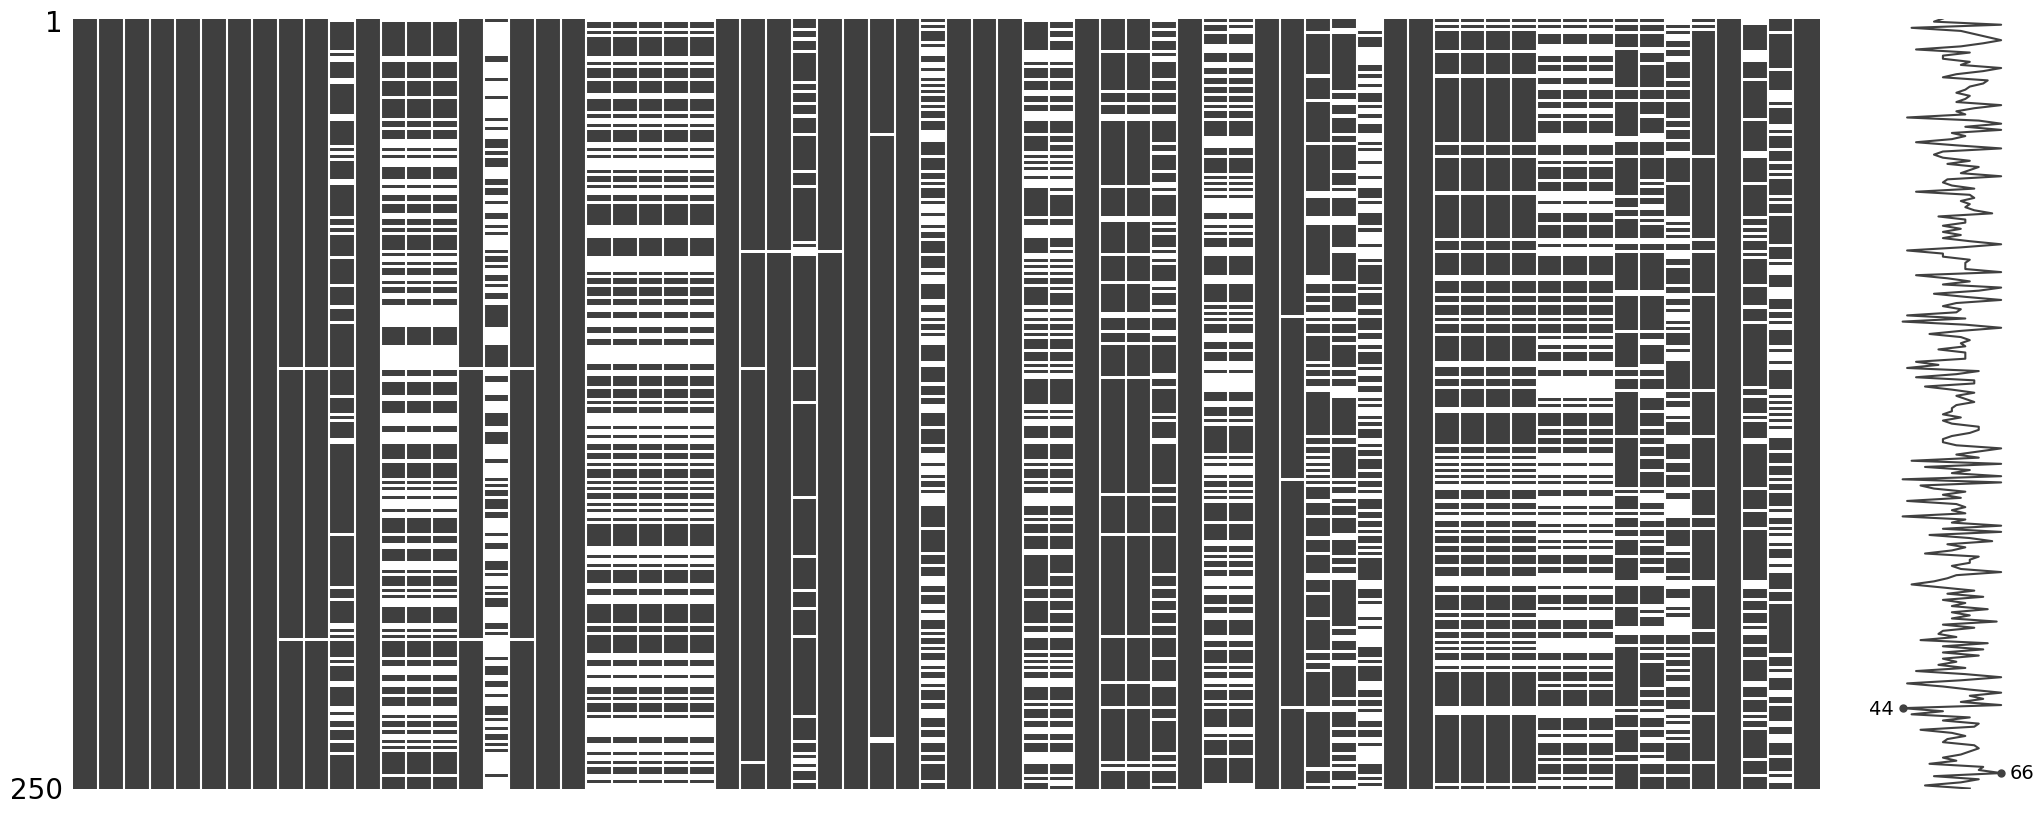

In [323]:
msno.matrix(df.sample(250))

In [324]:
df.columns.shape

(68,)

## Ultimate Goal

- Create Aggregate cards based on the targeted credit tiers 
- Capture APR, Grace Periods, Late Fees, Rewards, and Annual Fees

### Columns 0 - 10 Clean & FE
---

In [325]:
df.iloc[:5, 0:11]

,Institution Name,Product Name,Report Date,Availability of Credit Card Plan,Requirements for Opening,Secured Card,Targeted Credit Tiers,Purchase APR Offered?,Purchase APR Vary by Balance,Purchase APR Index,Variable Rate Index
0,FNBT BANK,MasterCard,Data as of December 31,National,No,No,Good credit (credit scores from 620 to 719),Yes,No,No,NaN
1,WINTHROP AREA FEDERAL CREDIT UNION,Visa Credit Platinum,Data as of December 31,National,No,No,Good credit (credit scores from 620 to 719); G...,Yes,No,No,NaN
2,WOORI AMERICA BANK,Classic,Data as of December 31,National,Yes,No,Good credit (credit scores from 620 to 719); G...,Yes,No,Yes,Prime
3,CENTRAL BANK & TRUST COMPANY,Classic Visa,Data as of December 31,Regional,Yes,No,Poor or fair credit (credit score 619 or less)...,No,NaN,NaN,NaN
4,CLEARWATER FEDERAL CREDIT UNION,Visa,Data as of December 31,National,No,No,Poor or fair credit (credit score 619 or less)...,Yes,No,No,NaN


In [326]:
df.iloc[:, 0:11].isnull().sum()

Institution Name                      0
Product Name                          0
Report Date                           0
Availability of Credit Card Plan      0
Requirements for Opening              0
Secured Card                          0
Targeted Credit Tiers                 0
Purchase APR Offered?                 0
Purchase APR Vary by Balance         14
Purchase APR Index                   14
Variable Rate Index                 113
dtype: int64

In [327]:
df[df["Purchase APR Offered?"] == "No"].count()

Institution Name                    14
Product Name                        14
Report Date                         14
Availability of Credit Card Plan    14
Requirements for Opening            14
                                    ..
Card Features                       13
Contact Information Types           14
Website for Consumer                11
Telephone Number for Consumers      13
Created Date                        14
Length: 68, dtype: int64

In [328]:
# 14 null values exist in this column, which matches up with when Purchase APR Offered? is No. For eventual encoding, we are preserving the relationship by replacing null values with __
df["Purchase APR Vary by Balance"].fillna('__', inplace=True)

In [329]:
# 14 null values exist in this column, which matches up with when Purchase APR Offered? is No. For eventual encoding, we are preserving the relationship by replacing null values with __
df["Purchase APR Index"].fillna('__', inplace=True)

In [330]:
mask = df["Variable Rate Index"].isna()

In [331]:
select_cols = ["Purchase APR Offered?","Purchase APR Vary by Balance","Purchase APR Index","Variable Rate Index"]

In [332]:
for col in df[mask][select_cols]:
    print(df[mask][col].value_counts())

Yes    99
No     14
Name: Purchase APR Offered?, dtype: int64
No    99
__    14
Name: Purchase APR Vary by Balance, dtype: int64
No    99
__    14
Name: Purchase APR Index, dtype: int64
Series([], Name: Variable Rate Index, dtype: int64)


In [333]:
# 113 null values, all related to either No values in related columns or our own input for NaN Values, similar decision in preserving relationship by replacing with __
df["Variable Rate Index"].fillna('__', inplace=True)

In [334]:
df["Targeted Credit Tiers"].value_counts()

Poor or fair credit (credit score 619 or less); Good credit (credit scores from 620 to 719); Great Credit (credit score of 720 or greater)    275
Good credit (credit scores from 620 to 719); Great Credit (credit score of 720 or greater)                                                    164
Great Credit (credit score of 720 or greater)                                                                                                  89
Poor or fair credit (credit score 619 or less)                                                                                                 80
Good credit (credit scores from 620 to 719)                                                                                                    34
Poor or fair credit (credit score 619 or less); Good credit (credit scores from 620 to 719)                                                     6
Name: Targeted Credit Tiers, dtype: int64

In [335]:
df_clean_copy = df.copy()

In [336]:
df_clean_copy.to_csv("../data/aggregated_cars_preclean.csv")

In [350]:
df = pd.read_csv("../data/aggregated_cars_preclean.csv", index_col=0)

In [351]:
df["Targeted Credit Tiers"] = df["Targeted Credit Tiers"].apply(lambda x: x.lower())

In [352]:
df["Targeted Credit Tiers"].value_counts()

poor or fair credit (credit score 619 or less); good credit (credit scores from 620 to 719); great credit (credit score of 720 or greater)    275
good credit (credit scores from 620 to 719); great credit (credit score of 720 or greater)                                                    164
great credit (credit score of 720 or greater)                                                                                                  89
poor or fair credit (credit score 619 or less)                                                                                                 80
good credit (credit scores from 620 to 719)                                                                                                    34
poor or fair credit (credit score 619 or less); good credit (credit scores from 620 to 719)                                                     6
Name: Targeted Credit Tiers, dtype: int64

In [353]:
df["Targeted Credit Tiers"] = df["Targeted Credit Tiers"].str.split("; ")

In [354]:
df["Targeted Credit Tiers"][1]

['good credit (credit scores from 620 to 719)',
 'great credit (credit score of 720 or greater)']

In [355]:
# Create Separate Columns for each bucket
df['Poor_Fair_Group'] = df['Targeted Credit Tiers'].apply(lambda x: any(re.search(r'poor', s) for s in x))
df['Good_Credit_Group'] = df['Targeted Credit Tiers'].apply(lambda x: any(re.search(r'good', s) for s in x))
df['Great_Credit_Group'] = df['Targeted Credit Tiers'].apply(lambda x: any(re.search(r'great', s) for s in x))

In [356]:
df[['Poor_Fair_Group','Good_Credit_Group','Great_Credit_Group']]

,Poor_Fair_Group,Good_Credit_Group,Great_Credit_Group
0,False,True,False
1,False,True,True
2,False,True,True
3,True,True,True
4,True,True,True
...,...,...,...
643,False,False,True
644,False,False,True
645,False,False,True
646,True,True,True


In [357]:
# remove original column
df.drop("Targeted Credit Tiers", axis=1, inplace=True)

In [358]:
# convert boolean into numerical values
df['Poor_Fair_Group'] = df['Poor_Fair_Group'].astype(int)
df['Good_Credit_Group'] = df['Good_Credit_Group'].astype(int)
df['Great_Credit_Group'] = df['Great_Credit_Group'].astype(int)

In [359]:
df[['Poor_Fair_Group','Good_Credit_Group','Great_Credit_Group']].head()

,Poor_Fair_Group,Good_Credit_Group,Great_Credit_Group
0,0,1,0
1,0,1,1
2,0,1,1
3,1,1,1
4,1,1,1


In [360]:
df.iloc[:, 0:11].isnull().sum()

Institution Name                    0
Product Name                        0
Report Date                         0
Availability of Credit Card Plan    0
Requirements for Opening            0
Secured Card                        0
Purchase APR Offered?               0
Purchase APR Vary by Balance        0
Purchase APR Index                  0
Variable Rate Index                 0
Index                               0
dtype: int64

In [361]:
df.shape

(648, 70)

- Added 3 columns for Credit Group
- Removed original column housing multiple options
- removed null values by imputing a new string value of '__' to keep the difference as well as reduce complexity of potential ohe later on

### Columns 10 - 20 Clean
---

In [364]:
df.iloc[:10, 10:21]

,Index,Poor or Fair Credit,Good Credit,Great Credit,Minimum APR,Median APR,Maximum APR,Introductory APR Offered?,Balance Transfer Offered?,Balance Transfer APR Vary by Credit Tier,Minimum APR.2
0,F,NaN,NaN,NaN,0.1490,0.1490,0.1800,No,Yes,No,0.1490
1,F,NaN,NaN,NaN,0.1150,0.1150,0.1150,No,Yes,No,0.1150
2,V,NaN,NaN,NaN,0.2099,0.2099,0.2099,No,Yes,No,0.2099
3,F,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,0.1650
4,F,0.1590,0.1090,0.0790,0.0790,NaN,0.1690,No,Yes,Yes,0.0790
5,F,0.1680,0.1290,0.1290,0.1290,NaN,0.1680,No,Yes,Yes,0.1290
6,F,0.1521,0.1096,0.0799,0.0799,NaN,0.1800,No,Yes,Yes,0.0799
7,F,NaN,NaN,NaN,0.0999,0.0999,0.0999,No,Yes,No,0.0999
8,V,NaN,NaN,NaN,0.1025,0.1225,0.1425,No,Yes,No,0.1025
9,V,0.1800,0.1499,0.1050,0.1050,NaN,0.1800,No,Yes,Yes,0.1050


In [367]:
df.iloc[:, 10:21].isnull().sum()

Index                                         0
Poor or Fair Credit                         286
Good Credit                                 286
Great Credit                                286
Minimum APR                                  14
Median APR                                  376
Maximum APR                                  14
Introductory APR Offered?                     0
Balance Transfer Offered?                     0
Balance Transfer APR Vary by Credit Tier    315
Minimum APR.2                               315
dtype: int64

- For Most missing numerical values with relation to APR specifically we will be using sklearn's KNNImputer (more on that below)
- For more potentially obvious missing values such as Balance Transfer APR.., we'll solve below

In [372]:
df["Balance Transfer Offered?"].value_counts()

Yes    333
No     315
Name: Balance Transfer Offered?, dtype: int64

In [371]:
df["Balance Transfer APR Vary by Credit Tier"].value_counts()

No     228
Yes    105
Name: Balance Transfer APR Vary by Credit Tier, dtype: int64

In [373]:
df["Balance Transfer APR Vary by Credit Tier"].fillna('__', inplace=True)

In [380]:
df.iloc[:, 10:21].isnull().sum()

Index                                         0
Poor or Fair Credit                         286
Good Credit                                 286
Great Credit                                286
Minimum APR                                  14
Median APR                                  376
Maximum APR                                  14
Introductory APR Offered?                     0
Balance Transfer Offered?                     0
Balance Transfer APR Vary by Credit Tier      0
BT_Min_APR                                  315
dtype: int64

- coincidence that there are also 315 missing values for Minimum APR.2, same figure we just solved for with Balance Transfer APR?
- It is not, we now have a better understanding of the different columns we are working with. With no initial dictionary we had a hard time initially understanding what the different values could mean, but through cleaning we have gleaned an insight:
    - each numbered APR (e.g.: Minimum APR.2, Maximum APR.n) is in relation to the previous categorical variables re: Balance Transfer, Cash Advance, etc.
    - we'll rename the columns so they are more transparent
    - further cleaning will take these groupings into account

In [377]:
df.rename(columns={"Minimum APR.2":"BT_Min_APR",
                   "Maximum APR.2":"BT_Max_APR",
                   "Minimum APR.3":"CA_Min_APR",
                   "Median APR.3":"CA_Median_APR",
                   "Maximum APR.3":"CA_Max_APR"}, inplace=True)

### Columns 20 - 30 Clean and FE

In [378]:
df.iloc[:5, 20:31]

,BT_Min_APR,BT_Max_APR,Median Length of Balance Transfer APR,Balance Transfer Grace Period,Cash Advance APR Offered?,Cash Advance APR Vary by Credit Tier,CA_Min_APR,CA_Median_APR,CA_Max_APR,Grace Period Offered?,Grace Period
0,0.1490,0.1800,0.0,No,Yes,No,0.1490,0.1490,0.1800,Yes,25.0
1,0.1150,0.1150,6.0,Yes,Yes,No,0.1150,0.1150,0.1150,Yes,25.0
2,0.2099,0.2099,6.0,Yes,Yes,No,0.2499,0.2499,0.2499,Yes,6.0
3,0.1650,0.1650,16.5,No,Yes,No,0.1650,0.1650,0.1650,Yes,25.0
4,0.0790,0.1690,6.0,No,Yes,Yes,0.0790,NaN,0.1690,Yes,25.0


In [385]:
df.iloc[:, 20:31].isnull().sum()

BT_Min_APR                               315
BT_Max_APR                               315
Median Length of Balance Transfer APR    315
Balance Transfer Grace Period            315
Cash Advance APR Offered?                  0
Cash Advance APR Vary by Credit Tier      12
CA_Min_APR                                 9
CA_Median_APR                             82
CA_Max_APR                                 9
Grace Period Offered?                      0
Grace Period                               4
dtype: int64

In [389]:
df.BT_Min_APR.fillna(0.0, inplace=True)
df.BT_Max_APR.fillna(0.0, inplace=True)
df["Median Length of Balance Transfer APR"].fillna(0.0, inplace=True)
df["Balance Transfer Grace Period"].fillna(0.0, inplace=True)

In [390]:
df.iloc[:, 20:31].isnull().sum()

BT_Min_APR                                0
BT_Max_APR                                0
Median Length of Balance Transfer APR     0
Balance Transfer Grace Period             0
Cash Advance APR Offered?                 0
Cash Advance APR Vary by Credit Tier     12
CA_Min_APR                                9
CA_Median_APR                            82
CA_Max_APR                                9
Grace Period Offered?                     0
Grace Period                              4
dtype: int64

- As there were 315 rows without Balance Transfer options, and now knowing that Min and Max APR.2 were in relation to having BT, for now we are going to impute 0.0 for the null values.
- If we had more time we could try and do some feature engineering to maybe remove the numerical values altogether and instead signifiy with just boolean values if there was apr value or not and in combination report a median APR instead of a min and max.
- Similarly will impute 0 for the other missing Balance Tranfer numerical fields:
    - Median Length of Balance Transfer APR
    - Balance Transfer Grace Period
- Cash Advance below:

In [393]:
df["Cash Advance APR Vary by Credit Tier"].value_counts()

No     566
Yes     70
Name: Cash Advance APR Vary by Credit Tier, dtype: int64

In [397]:
mask = df["Cash Advance APR Vary by Credit Tier"].isna()

In [400]:
selected_cols = ["Cash Advance APR Offered?","CA_Min_APR","CA_Median_APR","CA_Max_APR"]

In [401]:
df[selected_cols][mask]

,Cash Advance APR Offered?,CA_Min_APR,CA_Median_APR,CA_Max_APR
10,No,NaN,NaN,NaN
14,No,NaN,NaN,NaN
138,No,NaN,NaN,NaN
166,No,NaN,NaN,NaN
169,No,NaN,NaN,NaN
170,No,NaN,NaN,NaN
470,No,NaN,NaN,NaN
471,No,NaN,NaN,NaN
485,Yes,0.0525,NaN,0.180
486,Yes,0.0525,NaN,0.180


In [402]:
mask = df["Cash Advance APR Vary by Credit Tier"] == "Yes"
df[selected_cols][mask]

,Cash Advance APR Offered?,CA_Min_APR,CA_Median_APR,CA_Max_APR
4,Yes,0.0790,NaN,0.1690
5,Yes,0.1290,NaN,0.1680
6,Yes,0.0799,NaN,0.1800
9,Yes,0.1050,NaN,0.1800
11,Yes,0.1099,NaN,0.1599
...,...,...,...,...
597,Yes,0.1299,NaN,0.2499
603,Yes,0.1415,NaN,0.1790
609,Yes,0.1465,NaN,0.1800
610,Yes,0.1399,NaN,0.1800


In [404]:
df["Cash Advance APR Vary by Credit Tier"].fillna(df["Cash Advance APR Offered?"], inplace=True)

- For "Cash Advance APR Vary..", there's a mix of values in related columns, the majority are no or null. We'll impute "No" for the rows where "Cash Advance APR Offered?" is also No. We'll impute "Yes" where "Cash Advance APR Offered?" is also Yes as they follow similar behavior
- for missing apr values, we'll be using KNNImputer as mentioned above, more on that below.
- Grace Period below:

In [406]:
mask = df["Grace Period"].isna()
selected_cols = ["Grace Period Offered?"]

In [407]:
df[selected_cols][mask]

,Grace Period Offered?
580,No
581,No
595,No
647,No


In [408]:
df["Grace Period"].fillna(0.0, inplace=True)

In [409]:
df.iloc[:, 20:31].isnull().sum()

BT_Min_APR                                0
BT_Max_APR                                0
Median Length of Balance Transfer APR     0
Balance Transfer Grace Period             0
Cash Advance APR Offered?                 0
Cash Advance APR Vary by Credit Tier      0
CA_Min_APR                                9
CA_Median_APR                            82
CA_Max_APR                                9
Grace Period Offered?                     0
Grace Period                              0
dtype: int64

### Columns 31 - 40 Clean and FE
---

In [414]:
df.iloc[:5, 31:41]

,Minimum Finance Charge?,Minimum Finance Charge (Dollars),Balance Computation Method,Purchase Transaction Fees,Balance Transfer Fees?,Balance Transfer Fee Types,Balance Transfer Fee (%),Cash Advance Fees?,Cash Advance Fee For Each Transaction,Cash Advance Fee Types
0,No,NaN,Average daily balance including new purchases,No,Yes,"2. If fee is percentage of transaction amount,...",0.03,Yes,No,2. If the fee is a percentage of transaction a...
1,Yes,0.01,Average daily balance including new purchases,No,No,NaN,NaN,No,NaN,NaN
2,Yes,0.50,Average daily balance excluding new purchases,No,Yes,"1. If fee is charged in dollars, what is the a...",0.03,Yes,Yes,"1. If the fee is charged in dollars, what is t..."
3,No,NaN,Average daily balance including new purchases,No,No,NaN,NaN,No,NaN,NaN
4,No,NaN,Average daily balance including new purchases,No,No,NaN,NaN,No,NaN,NaN


In [415]:
df.iloc[:, 31:41].isnull().sum()

Minimum Finance Charge?                    0
Minimum Finance Charge (Dollars)         243
Balance Computation Method                 0
Purchase Transaction Fees                  0
Balance Transfer Fees?                     0
Balance Transfer Fee Types               239
Balance Transfer Fee (%)                 253
Cash Advance Fees?                         0
Cash Advance Fee For Each Transaction     75
Cash Advance Fee Types                    75
dtype: int64

In [416]:
df["Minimum Finance Charge?"].value_counts()

Yes    405
No     243
Name: Minimum Finance Charge?, dtype: int64

In [417]:
df["Balance Transfer Fees?"].value_counts()

Yes    409
No     239
Name: Balance Transfer Fees?, dtype: int64

In [419]:
df["Cash Advance Fees?"].value_counts()

Yes    573
No      75
Name: Cash Advance Fees?, dtype: int64

In [420]:
df["Minimum Finance Charge (Dollars)"].fillna(0.0, inplace=True)

In [423]:
df["Balance Transfer Fee Types"].value_counts()

__                                                                                                                                                                                                                                        239
1. If fee is charged in dollars, what is the amount?; 2. If fee is percentage of transaction amount, what is it?                                                                                                                          199
2. If fee is percentage of transaction amount, what is it?; 3. If there's a minimum dollar amount, what is it?                                                                                                                            124
2. If fee is percentage of transaction amount, what is it?                                                                                                                                                                                 59
4. If the fee is not a percentage, or a percenta

In [422]:
df["Balance Transfer Fee Types"].fillna("__", inplace=True)

In [430]:
mask = df["Balance Transfer Fee (%)"].isna()
selected_cols = ["Balance Transfer Fees?","Balance Transfer Fee Types"]
df[selected_cols][mask]

,Balance Transfer Fees?,Balance Transfer Fee Types
1,No,__
3,No,__
4,No,__
5,No,__
6,No,__
...,...,...
609,No,__
610,No,__
629,No,__
630,No,__


In [432]:
df["Balance Transfer Fee (%)"].fillna(0.0,inplace=True)

In [425]:
df["Cash Advance Fee For Each Transaction"].value_counts()

Yes    556
No      17
Name: Cash Advance Fee For Each Transaction, dtype: int64

In [426]:
df["Cash Advance Fee For Each Transaction"].fillna("__", inplace=True)
df["Cash Advance Fee Types"].fillna("__", inplace=True)

- Easy Answers for a couple of columns, where their respective columns have "No" and the number of nulls lines up, we will impute with either 0 for numerical values, and '__' for categorical

In [433]:
df.iloc[:, 31:41].isnull().sum()

Minimum Finance Charge?                  0
Minimum Finance Charge (Dollars)         0
Balance Computation Method               0
Purchase Transaction Fees                0
Balance Transfer Fees?                   0
Balance Transfer Fee Types               0
Balance Transfer Fee (%)                 0
Cash Advance Fees?                       0
Cash Advance Fee For Each Transaction    0
Cash Advance Fee Types                   0
dtype: int64

### Columns 41 - 50 Clean and FE
---

In [434]:
df.iloc[:5, 41:51]

,Amount (Percent) - Transaction Fee,Foreign Transaction Fees?,Foreign Transaction Fees Types,Foreign Transaction Fee (%),Late Fees?,Late Fee Types,Amount (Dollars) - Late Payment Fee,Late Fee Six Month Billing Cycle,Late Fee Policy Details,Over Limit Fees?
0,0.02,Yes,"2. If fee is percentage of transaction amount,...",0.01,Yes,1. What is the amount of the first late fee on...,10.0,NaN,NaN,No
1,NaN,No,NaN,NaN,No,NaN,NaN,NaN,NaN,Yes
2,0.03,No,NaN,NaN,Yes,1. What is the amount of the first late fee on...,29.0,40.0,NaN,No
3,NaN,Yes,"2. If fee is percentage of transaction amount,...",0.01,Yes,3. If you charge late fees that are not fixed ...,NaN,NaN,$5.00 or if balance is less than $5.00 then th...,No
4,NaN,Yes,"2. If fee is percentage of transaction amount,...",0.01,Yes,3. If you charge late fees that are not fixed ...,NaN,NaN,"5% of the payment due, minimum $15.00 not to e...",No


In [439]:
df.iloc[:, 41:51].isnull().sum()

Amount (Percent) - Transaction Fee     172
Foreign Transaction Fees?                0
Foreign Transaction Fees Types         245
Foreign Transaction Fee (%)            249
Late Fees?                               0
Late Fee Types                           7
Amount (Dollars) - Late Payment Fee    110
Late Fee Six Month Billing Cycle       130
Late Fee Policy Details                320
Over Limit Fees?                         0
dtype: int64

- There's no real way to verify what the Amount - fields are in reference to and so will drop them for now. If in the future someone is able to decipher their meaning feel free to include them again
- Similar treatments as above patterns

In [442]:
df.drop(columns=["Amount (Percent) - Transaction Fee","Amount (Dollars) - Late Payment Fee"], inplace=True)

In [443]:
df.iloc[:, 41:51].isnull().sum()

Foreign Transaction Fees?             0
Foreign Transaction Fees Types      245
Foreign Transaction Fee (%)         249
Late Fees?                            0
Late Fee Types                        7
Late Fee Six Month Billing Cycle    130
Late Fee Policy Details             320
Over Limit Fees?                      0
Other Fees                            0
Additional Fees                     148
dtype: int64

In [445]:
df["Foreign Transaction Fees?"].value_counts()

Yes    403
No     245
Name: Foreign Transaction Fees?, dtype: int64

In [448]:
df["Foreign Transaction Fees Types"].fillna('__', inplace=True)

In [467]:
mask = df["Foreign Transaction Fee (%)"].isna()
df[["Foreign Transaction Fees Types"]][mask].value_counts()

Foreign Transaction Fees Types                                                                                      
4. If the fee is not a percentage, or a percentage subject to a minimum dollar amount, how do you calculate the fee?    4
dtype: int64

In [468]:
df["Foreign Transaction Fee (%)"].fillna(4.0,inplace=True)

- admittedly a quick decision, but given time constraints and the given value of FT fee type for the remaining null values, we imputed 4% as a guess from the above.

In [446]:
df["Late Fees?"].value_counts()

Yes    641
No       7
Name: Late Fees?, dtype: int64

In [450]:
df["Late Fee Types"].fillna('__', inplace=True)

In [472]:
df["Late Fee Types"].value_counts()

1. What is the amount of the first late fee on the account?; 2. What is the amount of late fees charged within six billing cycles of a previous late fee (repeat late fee)?                                                                                                             264
1. What is the amount of the first late fee on the account?; 2. What is the amount of late fees charged within six billing cycles of a previous late fee (repeat late fee)?; 3. If you charge late fees that are not fixed dollar amounts, please explain your late fee policy here.    219
3. If you charge late fees that are not fixed dollar amounts, please explain your late fee policy here.                                                                                                                                                                                  68
1. What is the amount of the first late fee on the account?                                                                                         

In [470]:
df["Late Fee Six Month Billing Cycle"].value_counts()

40.0     309
39.0      71
41.0      55
35.0      27
25.0      17
38.0      16
15.0       6
29.0       5
27.0       4
10.0       3
37.0       2
0.0        1
24.5       1
246.0      1
Name: Late Fee Six Month Billing Cycle, dtype: int64

In [475]:
df["Late Fee Six Month Billing Cycle"].fillna(0.0, inplace=True)

- given the array of values, it's possible that there is no late fee 6 month billing cycle thus no value, will impute 0.0 to retain value

In [471]:
df["Late Fee Policy Details"].value_counts()

Late Fee cannot exceed the minimum payment due.                163
Up to $29.00 for first late fee.                                24
The late fee will not exceed the Minimum Payment Due.           16
Up to $41                                                       15
Up to $27.00 for first late fee.                                 8
                                                              ... 
$25.00 or your minimum payment required, whichever is less.      1
The lesser of $15 or the amount past due.                        1
5% of the payment due, minimum $15.00 not to exceed $27.00       1
Up to $10                                                        1
$10 or 10% of the outstanding balance, whichever is less         1
Name: Late Fee Policy Details, Length: 63, dtype: int64

In [473]:
df["Late Fee Policy Details"].fillna("__", inplace=True)

In [447]:
df["Additional Fees"].value_counts()

Yes    358
No     142
Name: Additional Fees, dtype: int64

In [476]:
df.iloc[:, 41:51].isnull().sum()

Foreign Transaction Fees?             0
Foreign Transaction Fees Types        0
Foreign Transaction Fee (%)           0
Late Fees?                            0
Late Fee Types                        0
Late Fee Six Month Billing Cycle      0
Late Fee Policy Details               0
Over Limit Fees?                      0
Other Fees                            0
Additional Fees                     148
dtype: int64

### Columns 51 - 60 Clean and FE
---

In [444]:
df.iloc[:5, 51:61]

,Other Fee Name,Other Fee Amount,Other Fee Explanation,Other Fee Name.1,Other Fee Amount.1,Other Fee Explanation.1,Services,Other Services,Rewards,Card Features
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cashback rewards,Chip card
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cashback rewards; Travel-related rewards,Contactless Payments; Chip card; Fee-free fore...
2,NaN,NaN,NaN,NaN,NaN,NaN,Automobile rental insurance; Credit card regis...,NaN,Travel-related rewards,Chip card; Fee-free foreign transactions; Mobi...
3,NaN,NaN,NaN,NaN,NaN,NaN,Automobile rental insurance; Other,Roadside assistance,NaN,Contactless Payments; Chip card; Mobile wallet...
4,Returned Payment Fee,10.0,Whenever a payment is returned for any reason.,NaN,NaN,NaN,Debt cancellation coverage; Other,Visa's credit monitoring (Norton Lifelock cred...,NaN,Contactless Payments; Chip card; Mobile wallet...


### Columns 61 -  Clean and FE
---

In [436]:
df.iloc[:5, 61:]

,Rewards,Card Features,Contact Information Types,Website for Consumer,Telephone Number for Consumers,Created Date,Poor_Fair_Group,Good_Credit_Group,Great_Credit_Group
0,Cashback rewards,Chip card,Phone; Website,https:www.fnbt.com,1-800-899-4321,3/21/2023,0,1,0
1,Cashback rewards; Travel-related rewards,Contactless Payments; Chip card; Fee-free fore...,Phone; Website,https://www.winthropcreditunion.org,800-511-1120,3/21/2023,0,1,1
2,Travel-related rewards,Chip card; Fee-free foreign transactions; Mobi...,Website,https://www.wooriamericabank.com,NaN,3/21/2023,0,1,1
3,NaN,Contactless Payments; Chip card; Mobile wallet...,Phone; Website,https://www.centralbank.com,(800)637-6884,3/22/2023,1,1,1
4,NaN,Contactless Payments; Chip card; Mobile wallet...,Phone; Website,https://www.clearwatercreditunion.org,800-254-1803,3/22/2023,1,1,1


### KNNImpute for Clean and Clustering Card Attempts
----

- For time sake, we are moving on from cleaning and feature engineering to start walking through KNNImputer and our cluster attemps

In [477]:
col_types = df.dtypes

In [478]:
num_cols = col_types[col_types != 'object'].index.tolist()
obj_cols = col_types[col_types == 'object'].index.tolist()

In [480]:
num_cols

['Poor or Fair Credit',
 'Good Credit',
 'Great Credit',
 'Minimum APR',
 'Median APR',
 'Maximum APR',
 'BT_Min_APR',
 'BT_Max_APR',
 'Median Length of Balance Transfer APR',
 'CA_Min_APR',
 'CA_Median_APR',
 'CA_Max_APR',
 'Grace Period',
 'Minimum Finance Charge (Dollars)',
 'Balance Transfer Fee (%)',
 'Foreign Transaction Fee (%)',
 'Late Fee Six Month Billing Cycle',
 'Other Fee Amount',
 'Other Fee Amount.1',
 'Poor_Fair_Group',
 'Good_Credit_Group',
 'Great_Credit_Group']

In [481]:
obj_cols

['Institution Name',
 'Product Name',
 'Report Date',
 'Availability of Credit Card Plan',
 'Requirements for Opening',
 'Secured Card',
 'Purchase APR Offered?',
 'Purchase APR Vary by Balance',
 'Purchase APR Index',
 'Variable Rate Index',
 'Index',
 'Introductory APR Offered?',
 'Balance Transfer Offered?',
 'Balance Transfer APR Vary by Credit Tier',
 'Balance Transfer Grace Period',
 'Cash Advance APR Offered?',
 'Cash Advance APR Vary by Credit Tier',
 'Grace Period Offered?',
 'Minimum Finance Charge?',
 'Balance Computation Method',
 'Purchase Transaction Fees',
 'Balance Transfer Fees?',
 'Balance Transfer Fee Types',
 'Cash Advance Fees?',
 'Cash Advance Fee For Each Transaction',
 'Cash Advance Fee Types',
 'Foreign Transaction Fees?',
 'Foreign Transaction Fees Types',
 'Late Fees?',
 'Late Fee Types',
 'Late Fee Policy Details',
 'Over Limit Fees?',
 'Other Fees',
 'Additional Fees',
 'Other Fee Name',
 'Other Fee Explanation',
 'Other Fee Name.1',
 'Other Fee Explanation

Num Columns to Keep

- let's rename for easier future use and better readability

In [487]:
df.rename(columns={"Poor or Fair Credit":"PF_Credit_APR",
 "Good Credit":"Good_Credit_APR",
 "Great Credit":"Great_Credit_APR",
 "Minimum Finance Charge (Dollars)":"Min_FinCharge_USD",
 "Balance Transfer Fee (%)":"BT_Fee_Percent",
 "Foreign Transaction Fee (%)":"FgnTx_Fee_Percent",
 "Late Fee Six Month Billing Cycle":"LF_6mo_BillCycle"},inplace=True)

In [498]:
num_to_keep = ['PF_Credit_APR',
 'Good_Credit_APR',
 'Great_Credit_APR',
 'Minimum APR',
 'Median APR',
 'Maximum APR',
 'BT_Min_APR',
 'BT_Max_APR',
 'Median Length of Balance Transfer APR',
 'CA_Min_APR',
 'CA_Median_APR',
 'CA_Max_APR',
 'Grace Period',
 'Min_FinCharge_USD',
 'BT_Fee_Percent',
 'FgnTx_Fee_Percent',
 'LF_6mo_BillCycle',
 'Poor_Fair_Group',
 'Good_Credit_Group',
 'Great_Credit_Group']

Object Columns to Keep

In [491]:
df[obj_cols].isnull().sum()

Institution Name                              0
Product Name                                  0
Report Date                                   0
Availability of Credit Card Plan              0
Requirements for Opening                      0
Secured Card                                  0
Purchase APR Offered?                         0
Purchase APR Vary by Balance                  0
Purchase APR Index                            0
Variable Rate Index                           0
Index                                         0
Introductory APR Offered?                     0
Balance Transfer Offered?                     0
Balance Transfer APR Vary by Credit Tier      0
Balance Transfer Grace Period                 0
Cash Advance APR Offered?                     0
Cash Advance APR Vary by Credit Tier          0
Grace Period Offered?                         0
Minimum Finance Charge?                       0
Balance Computation Method                    0
Purchase Transaction Fees               

In [497]:
obj_to_keep = ['Availability of Credit Card Plan',
 'Requirements for Opening',
 'Secured Card',
 'Purchase APR Offered?',
 'Purchase APR Vary by Balance',
 'Purchase APR Index',
 'Variable Rate Index',
 'Index',
 'Introductory APR Offered?',
 'Balance Transfer Offered?',
 'Balance Transfer APR Vary by Credit Tier',
 'Balance Transfer Grace Period',
 'Cash Advance APR Offered?',
 'Cash Advance APR Vary by Credit Tier',
 'Grace Period Offered?',
 'Minimum Finance Charge?',
 'Balance Computation Method',
 'Purchase Transaction Fees',
 'Balance Transfer Fees?',
 'Cash Advance Fees?',
 'Foreign Transaction Fees?',
 'Late Fees?']

In [494]:
len(num_cols),len(obj_cols)

(22, 46)

In [499]:
selected_cols_clustering = num_to_keep + obj_to_keep

In [500]:
len(selected_cols_clustering)

42

In [502]:
cols_for_cluster = [col for col in df.columns if col in selected_cols_clustering]

In [503]:
df[cols_for_cluster].to_csv("../data/df_for_clustering.csv")

In [504]:
df_to_cluster = pd.read_csv("../data/df_for_clustering.csv", index_col = 0)

In [505]:
col_types = df_to_cluster.dtypes
num_cols = col_types[col_types != 'object'].index.tolist()
obj_cols = col_types[col_types == 'object'].index.tolist()

In [512]:
df_to_cluster.shape

(648, 42)

In [518]:
df_to_cluster.isnull().sum()

Availability of Credit Card Plan              0
Requirements for Opening                      0
Secured Card                                  0
Purchase APR Offered?                         0
Purchase APR Vary by Balance                  0
Purchase APR Index                            0
Variable Rate Index                           0
Index                                         0
PF_Credit_APR                               286
Good_Credit_APR                             286
Great_Credit_APR                            286
Minimum APR                                  14
Median APR                                  376
Maximum APR                                  14
Introductory APR Offered?                     0
Balance Transfer Offered?                     0
Balance Transfer APR Vary by Credit Tier      0
BT_Min_APR                                    0
BT_Max_APR                                    0
Median Length of Balance Transfer APR         0
Balance Transfer Grace Period           

### Imputing Values with KNN
---

Preparation for Imputing: Looking at the descriptive stats to benchmark and backdrop changes made

In [521]:
df_to_cluster[["PF_Credit_APR","Good_Credit_APR","Great_Credit_APR","Minimum APR","Median APR","Maximum APR"]].describe()

,PF_Credit_APR,Good_Credit_APR,Great_Credit_APR,Minimum APR,Median APR,Maximum APR
count,362.000000,362.000000,362.000000,634.000000,272.000000,634.000000
mean,3.405962,0.687660,0.458316,0.704495,0.684211,0.762063
std,4.585383,2.068337,1.609361,2.178740,2.004383,2.164822
min,0.000000,0.102500,0.077500,0.000000,0.000000,0.000000
25%,0.219900,0.197400,0.164900,0.149900,0.209275,0.222400
50%,0.274350,0.243650,0.197400,0.184900,0.264900,0.272400
75%,9.990000,0.272400,0.220000,0.232400,0.317425,0.292400
max,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000


As the Survey results mention in the csv file: "../data/cfpb_updated_tccp.csv", values of 999.00% should be interpreted as "not applicable":
 - For both imputation and reality, we will need to change the values of numeric columns that have these kinds of values present, like all the above as you can see by the max row
 - We will impute all these values as 0.0%, and take note of the overall stat difference to account for reality

In [ ]:
df_to

In [524]:
df_to_cluster["PF_Credit_APR"].value_counts()

9.9900    118
0.2724     19
0.1800     18
0.0000     15
0.2649     12
         ... 
0.2474      1
0.2311      1
0.2149      1
0.2249      1
0.1650      1
Name: PF_Credit_APR, Length: 97, dtype: int64

In [522]:
df1_num_tf[["PF_Credit_APR","Good_Credit_APR","Great_Credit_APR","Minimum APR","Median APR","Maximum APR"]].describe()

,PF_Credit_APR,Good_Credit_APR,Great_Credit_APR,Minimum APR,Median APR,Maximum APR
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,3.551487,0.974861,1.013886,0.700170,0.464692,0.757707
std,4.202348,2.126303,2.178810,2.159031,1.518235,2.145206
min,0.000000,0.102500,0.077500,0.000000,0.000000,0.000000
25%,0.242400,0.220900,0.177400,0.149675,0.180000,0.219900
50%,0.292825,0.262400,0.211662,0.184900,0.223675,0.272400
75%,7.563256,0.280325,0.239600,0.232400,0.264900,0.292400
max,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000


In [511]:
# imputing
from sklearn.impute import KNNImputer

In [514]:
knn = KNNImputer(missing_values=np.nan, n_neighbors=4,metric='nan_euclidean')

In [515]:
data = knn.fit_transform(df_to_cluster[num_cols])

In [516]:
df1_num_tf = pd.DataFrame(data=data,columns=knn.get_feature_names_out())

In [517]:
df1_num_tf.head()

,PF_Credit_APR,Good_Credit_APR,Great_Credit_APR,Minimum APR,Median APR,Maximum APR,BT_Min_APR,BT_Max_APR,Median Length of Balance Transfer APR,CA_Min_APR,CA_Median_APR,CA_Max_APR,Grace Period,Min_FinCharge_USD,BT_Fee_Percent,FgnTx_Fee_Percent,LF_6mo_BillCycle,Poor_Fair_Group,Good_Credit_Group,Great_Credit_Group
0,2.659125,0.198475,0.170350,0.1490,0.14900,0.18000,0.1490,0.1800,0.0,0.1490,0.149000,0.1800,25.0,0.00,0.03,0.01,0.0,0.0,1.0,0.0
1,0.165375,0.152875,0.134725,0.1150,0.11500,0.11500,0.1150,0.1150,6.0,0.1150,0.115000,0.1150,25.0,0.01,0.00,0.00,0.0,0.0,1.0,1.0
2,0.253025,0.249900,0.214900,0.2099,0.20990,0.20990,0.2099,0.2099,6.0,0.2499,0.249900,0.2499,6.0,0.50,0.03,0.00,40.0,0.0,1.0,1.0
3,2.688675,0.227725,0.181150,0.1474,0.10595,0.23615,0.1650,0.1650,16.5,0.1650,0.165000,0.1650,25.0,0.00,0.00,0.01,0.0,1.0,1.0,1.0
4,0.159000,0.109000,0.079000,0.0790,0.09515,0.16900,0.0790,0.1690,6.0,0.0790,0.121125,0.1690,25.0,0.00,0.00,0.01,0.0,1.0,1.0,1.0


### Updated Clustering Attempt on new data set
---

In [508]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
#clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

### Original Clustering Attempt on new data set
---

In [128]:
df1 = df.copy()

In [151]:
df1_num = df[num_cols]

In [152]:
from sklearn.impute import KNNImputer

In [153]:
knn = KNNImputer(missing_values=np.nan, n_neighbors=5,metric='nan_euclidean')

In [154]:
data = knn.fit_transform(df1_num)

In [155]:
df1_num_tf = pd.DataFrame(data=data,columns=knn.get_feature_names_out())

In [156]:
df1_num_tf.head()

,Poor or Fair Credit,Good Credit,Great Credit,Minimum APR,Median APR,Maximum APR,Minimum APR.2,Maximum APR.2,Median Length of Balance Transfer APR,Minimum APR.3,...,Maximum APR.3,Grace Period,Minimum Finance Charge (Dollars),Balance Transfer Fee (%),Amount (Percent) - Transaction Fee,Foreign Transaction Fee (%),Amount (Dollars) - Late Payment Fee,Late Fee Six Month Billing Cycle,Other Fee Amount,Other Fee Amount.1
0,2.16780,0.19928,0.15578,0.14900,0.14900,0.18000,0.1490,0.1800,0.0,0.1490,...,0.1800,25.0,1.100,0.030,0.020,0.010,10.0,33.8,26.2,23.42
1,2.13680,0.14278,0.11426,0.11500,0.11500,0.11500,0.1150,0.1150,6.0,0.1150,...,0.1150,25.0,0.010,0.024,0.024,0.014,26.2,33.0,22.8,18.60
2,4.11096,0.19692,0.18062,0.20990,0.20990,0.20990,0.2099,0.2099,6.0,0.2499,...,0.2499,6.0,0.500,0.030,0.030,0.027,29.0,40.0,29.4,17.00
3,0.21430,0.20430,0.17532,0.15466,0.15844,0.18586,0.1650,0.1650,16.5,0.1650,...,0.1650,25.0,3.880,0.038,0.030,0.010,26.2,33.6,27.0,20.60
4,0.15900,0.10900,0.07900,0.07900,0.13540,0.16900,0.0790,0.1690,6.0,0.0790,...,0.1690,25.0,1.102,0.030,0.030,0.010,26.6,39.0,10.0,27.60


Clustering Alpha

In [145]:
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
#clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [157]:
sc = StandardScaler()

In [158]:
data_scaled = sc.fit_transform(df1_num_tf)

In [159]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [160]:
df1_num_tf["cluster"] = kmeans.fit_predict(data_scaled)

/Users/christopherjoyce/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [161]:
pca = PCA(n_components=2)

In [162]:
data_2d = pca.fit_transform(data_scaled)

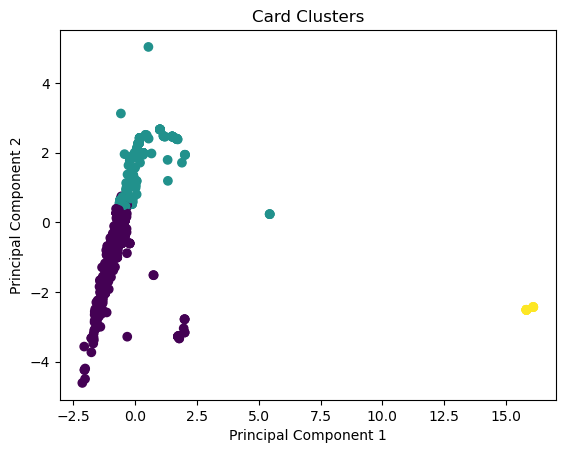

In [166]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df1_num_tf['cluster'], cmap='viridis')
plt.title('Card Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [164]:
sil = silhouette_score(data_scaled, df1_num_tf["cluster"])

In [165]:
sil

0.1929077438312663